In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,RobustScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor


In [186]:
data=pd.read_csv("C:/Downloads/Updater_SA_Upgrade/Project-2/train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [187]:
data.shape

(550068, 12)

# Visualization:

In [188]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [189]:
age=pd.pivot_table(data,values="Purchase",index="Age",aggfunc=np.sum)
age.head()

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403


 This below plot shows which age group people are purcahsing and spending more.


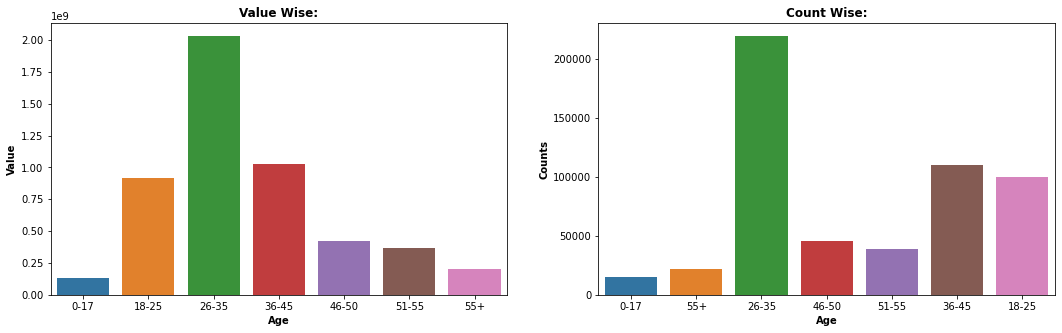

In [190]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title("Value Wise:",{"fontweight":"bold","fontsize":12})
sn.barplot(age.index,age["Purchase"])
plt.xlabel("Age",{"fontweight":"bold","fontsize":10})
plt.ylabel("Value",{"fontweight":"bold","fontsize":10})
plt.subplot(122)
plt.title("Count Wise:",{"fontweight":"bold","fontsize":12})
sn.countplot(data["Age"],)
plt.xlabel("Age",{"fontweight":"bold","fontsize":10})
plt.ylabel("Counts",{"fontweight":"bold","fontsize":10})
#plt.legend(loc="upper center",bbox_to_anchor=(1.00, 1.00), ncol=1)
print(" This below plot shows which age group people are purcahsing and spending more.")


In [191]:
gender=pd.pivot_table(data,values="Purchase",index="Gender",aggfunc=np.sum)
gender

,Purchase
Gender,
F,1186232642
M,3909580100


This plot shows there is high number of Males in both(Value & Volume)


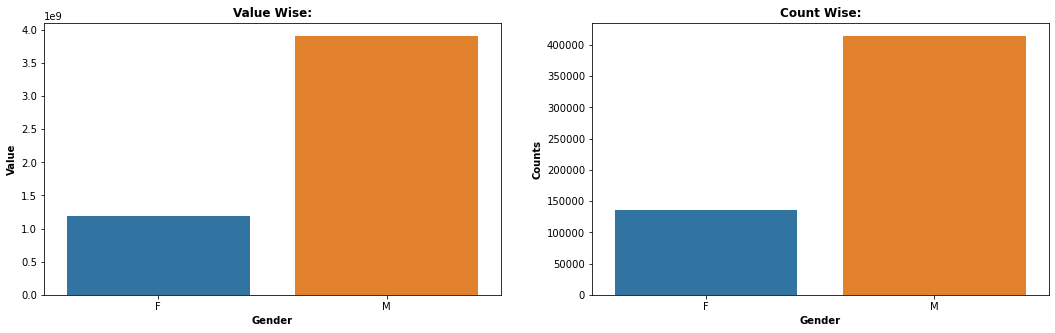

In [192]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title("Value Wise:",{"fontweight":"bold","fontsize":12})
sn.barplot(gender.index,gender["Purchase"])
plt.xlabel("Gender",{"fontweight":"bold","fontsize":10})
plt.ylabel("Value",{"fontweight":"bold","fontsize":10})
plt.subplot(122)
plt.title("Count Wise:",{"fontweight":"bold","fontsize":12})
sn.countplot(data["Gender"])
plt.xlabel("Gender",{"fontweight":"bold","fontsize":10})
plt.ylabel("Counts",{"fontweight":"bold","fontsize":10})
#plt.legend(loc="upper center",bbox_to_anchor=(1.00, 1.00), ncol=1)
print("This plot shows there is high number of Males in both(Value & Volume)")


In [735]:
Occupation=pd.pivot_table(data,values="Purchase",index="Occupation",aggfunc=np.sum)

Who is spending more (Occupation wise):
Who is Purchasing more (Occupation wise):


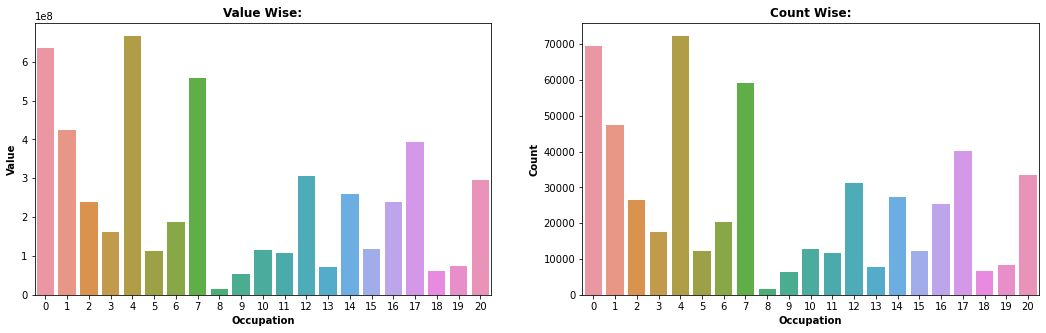

In [194]:

plt.figure(figsize=(18,5))
plt.subplot(121)

plt.title("Value Wise:",fontdict={"fontweight":"bold","fontsize":12})
sn.barplot(Occupation.index,Occupation["Purchase"],)
plt.xlabel("Occupation",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":10})
print("Who is spending more (Occupation wise):")

plt.subplot(122)
plt.title("Count Wise:",fontdict={"fontweight":"bold","fontsize":12})
sn.countplot(data["Occupation"])
plt.xlabel("Occupation",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
print("Who is Purchasing more (Occupation wise):")


plt.show()



In [195]:
City=pd.pivot_table(data,values="Purchase",index="City_Category",aggfunc=np.sum)

This plot shows B city customers are purchasing and spending more.


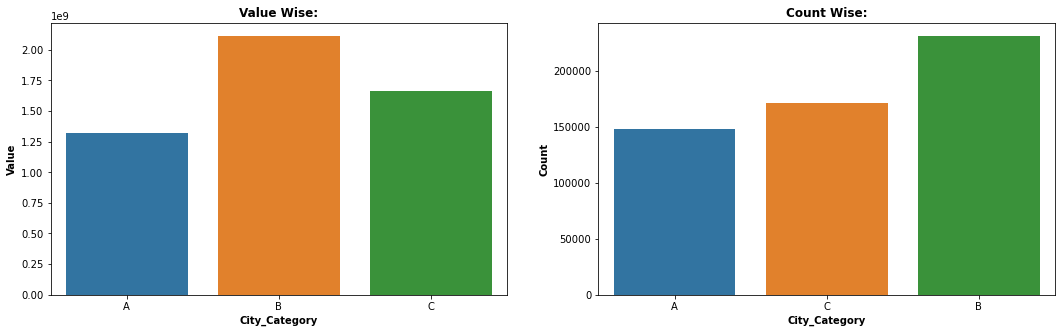

In [196]:

plt.figure(figsize=(18,5))
plt.subplot(121)

plt.title("Value Wise:",{"fontweight":"bold","fontsize":12})
sn.barplot(City.index,City["Purchase"])
plt.xlabel("City_Category",{"fontweight":"bold","fontsize":10})
plt.ylabel("Value",{"fontweight":"bold","fontsize":10})


plt.subplot(122)
plt.title("Count Wise:",{"fontweight":"bold","fontsize":12})
sn.countplot(data["City_Category"],)
plt.xlabel("City_Category",{"fontweight":"bold","fontsize":10})
plt.ylabel("Count",{"fontweight":"bold","fontsize":10})

print("This plot shows B city customers are purchasing and spending more.")


plt.show()



This shows who is purchasing more Gender wise and Age wise.


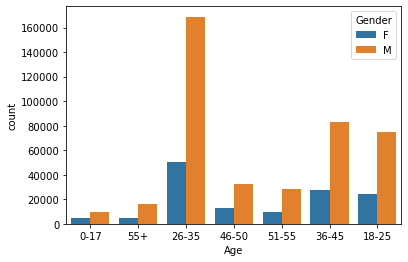

In [197]:
plt.figure.fig_size=(10,5)
sn.countplot(data['Age'],hue=data['Gender'])
print("This shows who is purchasing more Gender wise and Age wise.")

This plot shows, who is purchasing more Marital_Status and Age wise.


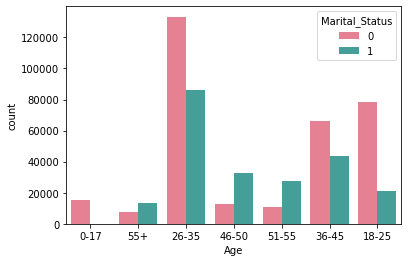

In [198]:
plt.figure.fig_size=(10,5)
sn.countplot(data['Age'],hue=data['Marital_Status'],palette='husl')
print("This plot shows, who is purchasing more Marital_Status and Age wise.")

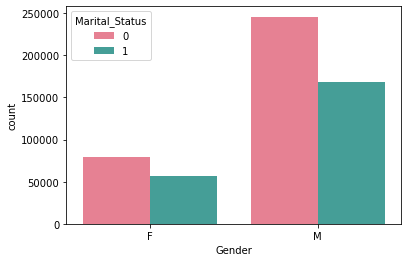

In [199]:
sn.countplot(data['Gender'],hue=data['Marital_Status'],palette='husl')

This plot show which Gender purchasing more(Product category wise):


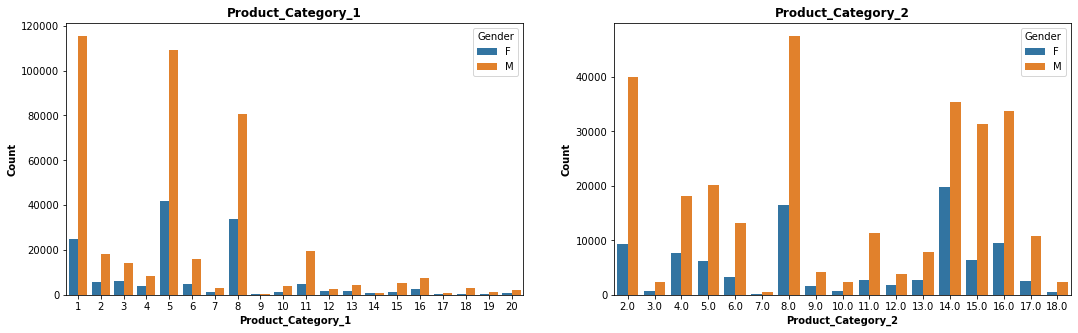

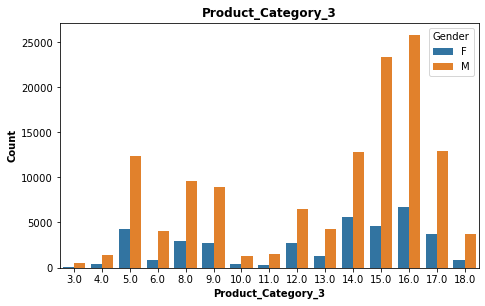

In [200]:


plt.figure(figsize=(18,5))
plt.subplot(121)
sn.countplot(data['Product_Category_1'],hue=data['Gender'])
plt.title("Product_Category_1",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
sn.countplot(data['Product_Category_2'],hue=data['Gender'])
plt.title("Product_Category_2",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.figure(figsize=(16.5,4.5))
plt.subplot(121)
sn.countplot(data['Product_Category_3'],hue=data['Gender'])
plt.title("Product_Category_3",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

print("This plot show which Gender purchasing more(Product category wise):")

This plot shows which Age group people are purchasing more(Product category wise):


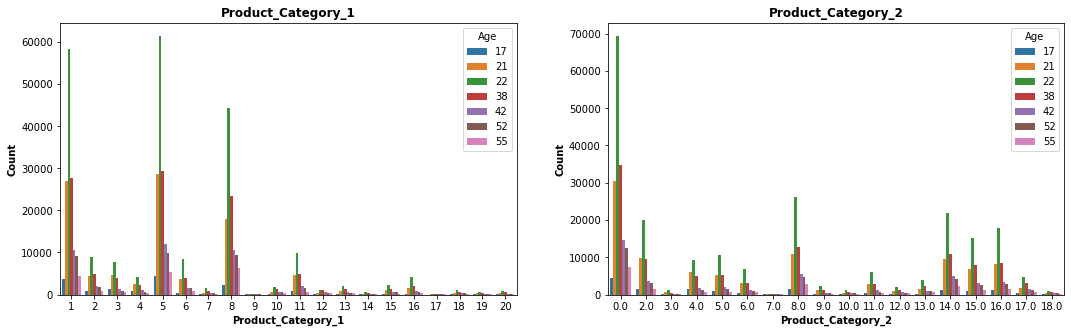

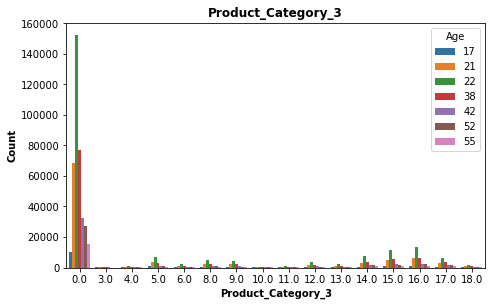

In [743]:

plt.figure(figsize=(18,5))
plt.subplot(121)
sn.countplot(data['Product_Category_1'],hue=data['Age'])
plt.title("Product_Category_1",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
sn.countplot(data['Product_Category_2'],hue=data['Age'])
plt.title("Product_Category_2",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.figure(figsize=(16.5,4.5))
plt.subplot(121)
sn.countplot(data['Product_Category_3'],hue=data['Age'])
plt.title("Product_Category_3",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

print("This plot shows which Age group people are purchasing more(Product category wise):")

This plot shows which Occupation people are purchasing more(Product category wise):


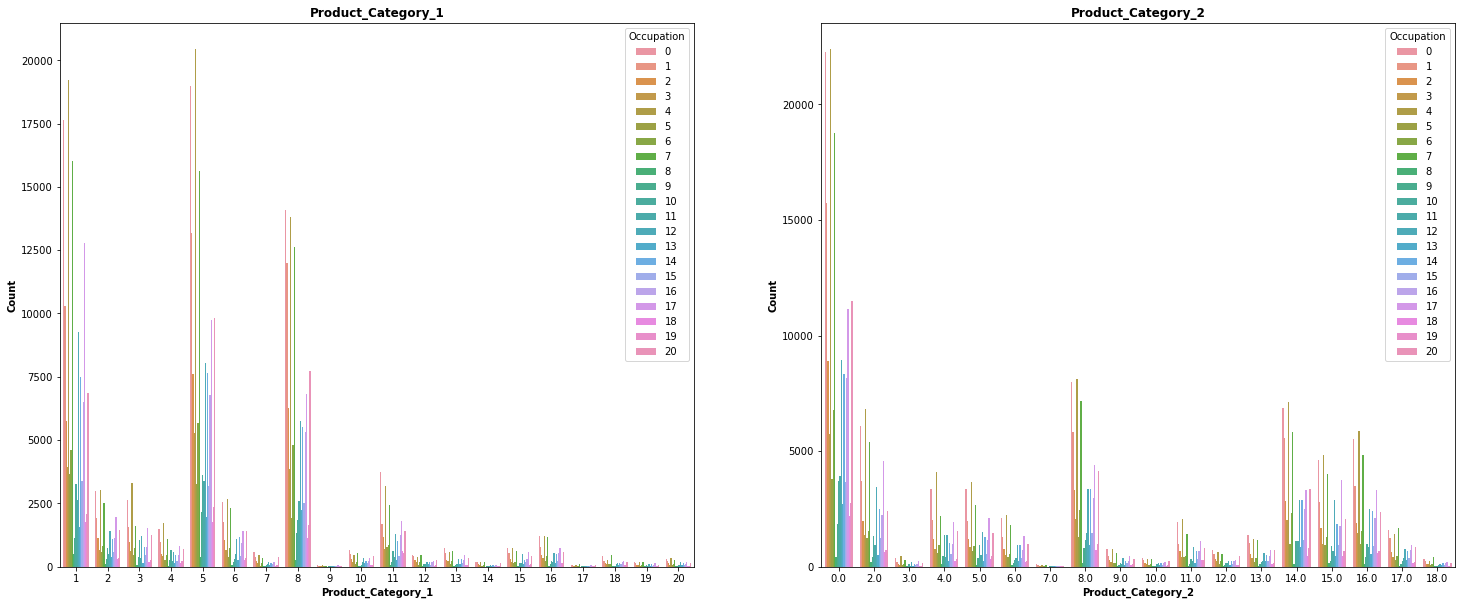

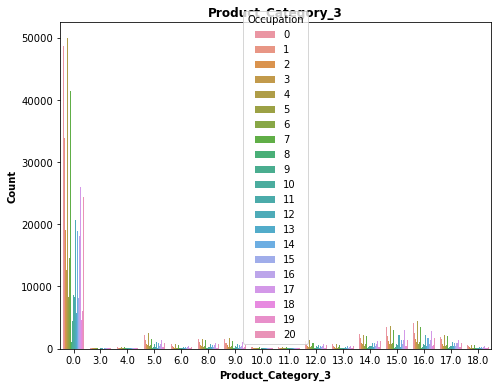

In [744]:

plt.figure(figsize=(25,10))
plt.subplot(121)
sn.countplot(data['Product_Category_1'],hue=data['Occupation'])
plt.title("Product_Category_1",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
sn.countplot(data['Product_Category_2'],hue=data['Occupation'])
plt.title("Product_Category_2",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

plt.figure(figsize=(17,6))
plt.subplot(121)

sn.countplot(data['Product_Category_3'],hue=data['Occupation'])
plt.title("Product_Category_3",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

print("This plot shows which Occupation people are purchasing more(Product category wise):")

This plot shows people who are from B City purchasing more(Product category wise):


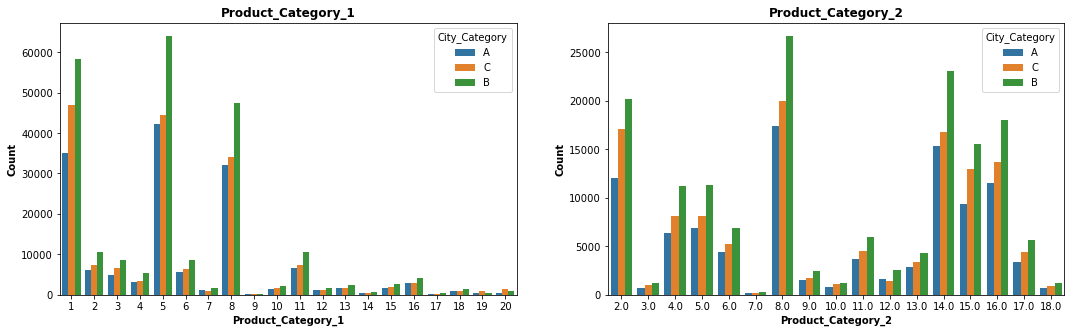

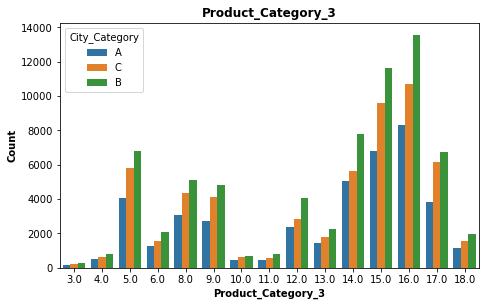

In [203]:

plt.figure(figsize=(18,5))
plt.subplot(121)
sn.countplot(data['Product_Category_1'],hue=data['City_Category'])
plt.title("Product_Category_1",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
sn.countplot(data['Product_Category_2'],hue=data['City_Category'])
plt.title("Product_Category_2",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.figure(figsize=(16.5,4.5))
plt.subplot(121)
sn.countplot(data['Product_Category_3'],hue=data['City_Category'])
plt.title("Product_Category_3",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

print("This plot shows people who are from B City purchasing more(Product category wise):")

In [204]:
saa=data["Occupation"].value_counts().sort_index()

In [205]:
sa=pd.pivot_table(data,values="Purchase",index="Occupation",aggfunc=np.sum)

This plot shows Unmarried people are purchasing more(Product category wise):


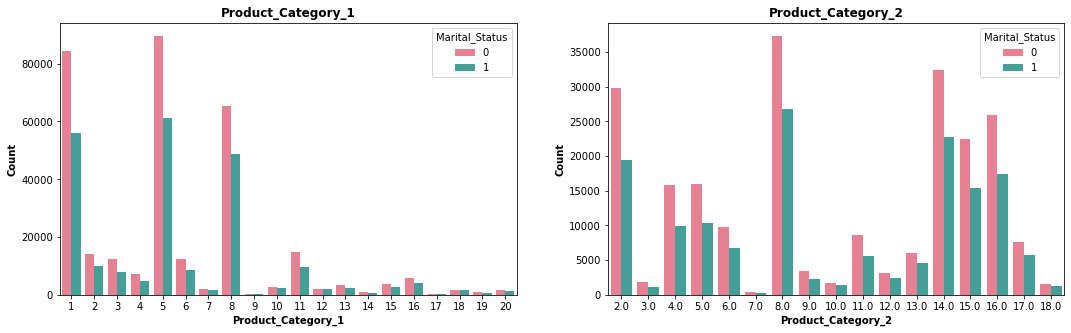

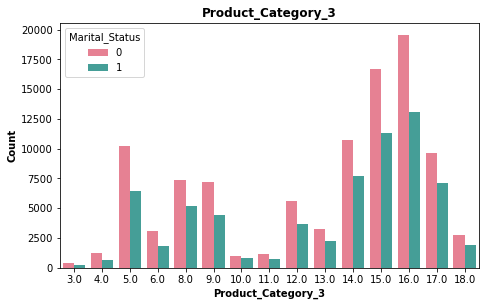

In [206]:

plt.figure(figsize=(18,5))
plt.subplot(121)
sn.countplot(data['Product_Category_1'],hue=data['Marital_Status'],palette='husl')
plt.title("Product_Category_1",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
sn.countplot(data['Product_Category_2'],hue=data['Marital_Status'],palette='husl')
plt.title("Product_Category_2",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})
plt.figure(figsize=(16.5,4.5))
plt.subplot(121)
sn.countplot(data['Product_Category_3'],hue=data['Marital_Status'],palette='husl')
plt.title("Product_Category_3",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":10})

print("This plot shows Unmarried people are purchasing more(Product category wise):")

In [207]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [208]:
data["Product_Category_1"].count()


550068

In [209]:
data["Product_Category_2"].count()

376430

In [210]:
data["Product_Category_3"].count()

166821

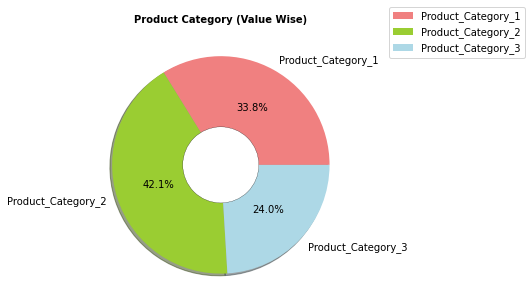

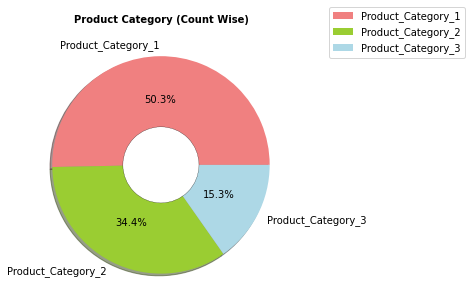

In [211]:

labels = "Product_Category_1","Product_Category_2","Product_Category_3"
sizes = [2972716,3704948,2113329]
colors = ['lightcoral', 'yellowgreen',"lightblue"]
explode = (0, 0, 0)  
#print("This Pie chart show the Highest number people from A city")
plt.figure(figsize=(5,5))
plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.legend(loc="upper left",bbox_to_anchor=(1.10, 1.10), ncol=1)
plt.title("Product Category (Value Wise)",fontdict={"fontweight":"bold","fontsize":10})       
centre_circle = plt.Circle((0,0),0.35,color='black', fc='white',linewidth=0.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


labels = "Product_Category_1","Product_Category_2","Product_Category_3"
sizes = [550068,376430,166821]
colors = ['lightcoral', 'yellowgreen',"lightblue"]
explode = (0, 0, 0)  
#print("This Pie chart show the Highest number people from A city")
plt.figure(figsize=(5,5))
plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.legend(loc="upper left",bbox_to_anchor=(1.10, 1.10), ncol=1)
plt.title("Product Category (Count Wise)",fontdict={"fontweight":"bold","fontsize":10})       
centre_circle = plt.Circle((0,0),0.35,color='black', fc='white',linewidth=0.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [212]:
years =pd.pivot_table(data,values="Purchase",index="Stay_In_Current_City_Years",aggfunc=np.sum)
years

,Purchase
Stay_In_Current_City_Years,
0,682979229
1,1792872533
2,949173931
3,884902659
4+,785884390


This plot shows highest sale value from 1 year.


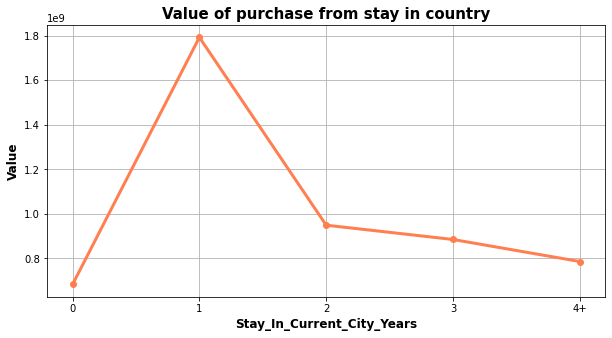

In [742]:

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(years.index,years.values,'go-',color="coral",linewidth=3)
plt.xlabel('Stay_In_Current_City_Years',fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel('Value',fontdict={"fontweight":"bold","fontsize":12})
plt.title('Value of purchase from stay in country',fontdict={"fontweight":"bold","fontsize":15})
print("This plot shows highest sale value from 1 year.")

In [214]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Detecting and Imputing the NA values :

There is huge number of Missing values in Products column.


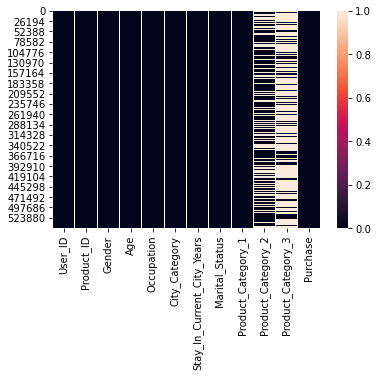

In [215]:
sn.heatmap(data.isnull())
print("There is huge number of Missing values in Products column.")

In Product_Category_2 and Product_Category_3 have huge number of missing values. We have to check and impute the default value.


In [216]:
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [217]:
data["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

I thought to use Statistical method to fill the NA values but instead using this method i will fill the NA values with 0.

In [218]:
data=data.fillna(0)

In [219]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Cleaning the dataset to insert in Modeling.

In [220]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In Age column there is a multi dimenstional figure i will make it to single dimenstional figure.

In [221]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [222]:
data["Age"]=data["Age"].replace({"0-17":17,"55+":55,"26-35":22,"46-50":42,"51-55":52,"36-45":38,"18-25":21})

In [223]:
data["Age"].unique()

array([17, 55, 22, 42, 52, 38, 21], dtype=int64)

In [224]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [225]:
data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].replace({"4+":4})

In [226]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4,0,8,0.0,0.0,7969


In [227]:
data=data.drop(["Product_ID"],1)

In [228]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,17,10,A,2,0,3,0.0,0.0,8370
1,1000001,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,17,10,A,2,0,12,0.0,0.0,1422
3,1000001,F,17,10,A,2,0,12,14.0,0.0,1057
4,1000002,M,55,16,C,4,0,8,0.0,0.0,7969


In [229]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [230]:
data["Gender"]=data["Gender"].map({"M":1,"F":2})

In [231]:
data["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [232]:
data["City_Category"]=data["City_Category"].map({"A":1,"B":2,"C":3})

In [233]:
label=LabelEncoder()
data["User_ID"]=data[["User_ID"]].apply(label.fit_transform)

In [234]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,2,17,10,1,2,0,3,0.0,0.0,8370
1,0,2,17,10,1,2,0,1,6.0,14.0,15200
2,0,2,17,10,1,2,0,12,0.0,0.0,1422
3,0,2,17,10,1,2,0,12,14.0,0.0,1057
4,1,1,55,16,3,4,0,8,0.0,0.0,7969


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 46.2+ MB


In [236]:
data["Stay_In_Current_City_Years"]=pd.to_numeric(data["Stay_In_Current_City_Years"])

In [237]:
data.shape

(550068, 11)

# Model Creation


In [320]:
x=data.drop(["Purchase"],1)
x.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,2,17,10,1,2,0,3,0.0,0.0
1,0,2,17,10,1,2,0,1,6.0,14.0
2,0,2,17,10,1,2,0,12,0.0,0.0
3,0,2,17,10,1,2,0,12,14.0,0.0
4,1,1,55,16,3,4,0,8,0.0,0.0


In [322]:
y=data["Purchase"]
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [323]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# XGBRegressor

In [324]:
XGB_Machine=XGBRegressor()
XGB_Machine.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [325]:
Pred=XGB_Machine.predict(x_test)

In [326]:
XGB_Machine.score(x_test,y_test)*100


68.78529581418722

In [327]:
XGB_Machine.score(x_train,y_train)*100

69.58209621826867

In [328]:
from sklearn.metrics import mean_squared_error

In [329]:
print("RMSE score (XGBRegressor) : ", np.sqrt(mean_squared_error(y_test,Pred)))

RMSE score (XGBRegressor) :  2808.746754422689


# DecisionTreeRegressor

In [330]:
DT_Machine=DecisionTreeRegressor()
DT_Machine.fit(x_train,y_train)

DecisionTreeRegressor()

In [331]:
DT_Pred=DT_Machine.predict(x_test)

In [332]:
DT_Machine.score(x_test,y_test)*100


51.71324729220446

In [333]:
print("RMSE score (DecisionTreeRegressor) : ", np.sqrt(mean_squared_error(y_test,DT_Pred)))

RMSE score (DecisionTreeRegressor) :  3493.389188188157


# RandomForestRegressor

In [334]:
RFR_Machine=RandomForestRegressor()
RFR_Machine.fit(x_train,y_train)

RandomForestRegressor()

In [335]:
RFR_Pred=DT_Machine.predict(x_test)

In [336]:
RFR_Machine.score(x_test,y_test)*100


64.76693250240153

In [337]:
print("RMSE score (RandomForestRegressor) : ", np.sqrt(mean_squared_error(y_test,RFR_Pred)))

RMSE score (RandomForestRegressor) :  3493.389188188157


# GradientBoostingRegressor

In [338]:
GR_Machine=GradientBoostingRegressor()
GR_Machine.fit(x_train,y_train)

GradientBoostingRegressor()

In [339]:
GR_Pred=GR_Machine.predict(x_test)

In [340]:
GR_Machine.score(x_test,y_test)*100


64.92256974948508

In [341]:
print("RMSE score (GradientBoostingRegressor) : ", np.sqrt(mean_squared_error(y_test,GR_Pred)))

RMSE score (GradientBoostingRegressor) :  2977.466313552015


In [342]:
print("RMSE score (XGBRegressor) : ", np.sqrt(mean_squared_error(y_test,Pred)))
print("RMSE score (DecisionTreeRegressor) : ", np.sqrt(mean_squared_error(y_test,DT_Pred)))
print("RMSE score (RandomForestRegressor) : ", np.sqrt(mean_squared_error(y_test,RFR_Pred)))
print("RMSE score (GradientBoostingRegressor) : ", np.sqrt(mean_squared_error(y_test,GR_Pred)))

RMSE score (XGBRegressor) :  2808.746754422689
RMSE score (DecisionTreeRegressor) :  3493.389188188157
RMSE score (RandomForestRegressor) :  3493.389188188157
RMSE score (GradientBoostingRegressor) :  2977.466313552015


Here XGBRegressor is giving decent accuracy rate compare to other Regressors. 


# Now i will use XGBRegressor Model for Test dataset to Predict the value.


Reading the Test dataset

In [387]:
test_data=pd.read_csv("C:/Downloads/Updater_SA_Upgrade/Project-2/test.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Cleaning process for  the Test Dataset

In [388]:
test_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [389]:
test_data=test_data.fillna(0)

In [390]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [391]:
test_data["Age"]=test_data["Age"].replace({"0-17":17,"55+":55,"26-35":22,"46-50":42,"51-55":52,"36-45":38,"18-25":21})
test_data["City_Category"]=test_data["City_Category"].map({"A":1,"B":2,"C":3})
test_data["Gender"]=test_data["Gender"].map({"M":1,"F":2})
test_data["Stay_In_Current_City_Years"]=test_data["Stay_In_Current_City_Years"].replace({"4+":4})
test_data["Stay_In_Current_City_Years"]=pd.to_numeric(test_data["Stay_In_Current_City_Years"])


In [392]:
label=LabelEncoder()
test_data["User_ID"]=test_data[["User_ID"]].apply(label.fit_transform)

In [393]:
test_data=test_data.drop(["Product_ID"],1)

In [394]:
test_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,1,42,7,2,2,1,1,11.0,0.0
1,8,1,22,17,3,0,0,3,5.0,0.0
2,9,2,38,1,2,4,1,5,14.0,0.0
3,9,2,38,1,2,4,1,4,9.0,0.0
4,10,2,22,1,3,1,0,4,5.0,12.0


# Test Dataset is ready to use for Prediction. 

In [395]:
Predicted_Purchase=XGB_Machine.predict(test_data)

In [396]:
Predicted_Purchase=pd.DataFrame(Predicted_Purchase)

In [397]:
Predicted_Purchase.head()

,0
0,14251.679688
1,11103.016602
2,7186.410156
3,3142.948730
4,2398.148193


In [398]:
Predicted_Purchase=Predicted_Purchase.rename(columns={0:"Predicted_Purchase"})
Predicted_Purchase.head()

,Predicted_Purchase
0,14251.679688
1,11103.016602
2,7186.410156
3,3142.948730
4,2398.148193


In [399]:
Predicted_Purchase=round(Predicted_Purchase)
Predicted_Purchase.head()

,Predicted_Purchase
0,14252.0
1,11103.0
2,7186.0
3,3143.0
4,2398.0


In [400]:
Pred=pd.DataFrame(Predicted_Purchase)

In [412]:
Pred_Data=pd.concat([test_data,Pred],1)
Pred_Data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Predicted_Purchase
0,3,1,42,7,2,2,1,1,11.0,0.0,14252.0
1,8,1,22,17,3,0,0,3,5.0,0.0,11103.0
2,9,2,38,1,2,4,1,5,14.0,0.0,7186.0
3,9,2,38,1,2,4,1,4,9.0,0.0,3143.0
4,10,2,22,1,3,1,0,4,5.0,12.0,2398.0


In [413]:
Pred_Data["City_Category"].unique()

array([2, 3, 1], dtype=int64)

In [414]:
Pred_Data["Age"]=test_data["Age"].replace({17:"0-17",55:"55+",22:"26-35",42:"46-50",52:"51-55",38:"36-45",21:"18-25"})
Pred_Data["City_Category"]=Pred_Data["City_Category"].map({1:"A",2:"B",3:"C"})
Pred_Data["Gender"]=Pred_Data["Gender"].map({1:"M",2:"F"})
Pred_Data["Stay_In_Current_City_Years"]=Pred_Data["Stay_In_Current_City_Years"].replace({4:"4+"})
#Pred_Data["Stay_In_Current_City_Years"]=pd.to_numeric(Pred_Data["Stay_In_Current_City_Years"])


In [415]:
Pred_Data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Predicted_Purchase
0,3,M,46-50,7,B,2,1,1,11.0,0.0,14252.0
1,8,M,26-35,17,C,0,0,3,5.0,0.0,11103.0
2,9,F,36-45,1,B,4+,1,5,14.0,0.0,7186.0
3,9,F,36-45,1,B,4+,1,4,9.0,0.0,3143.0
4,10,F,26-35,1,C,1,0,4,5.0,12.0,2398.0


# Visualization:

In [439]:
Gender=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Gender",aggfunc=np.sum)

This plot shows Males are going to spend more and our target should be on Males.


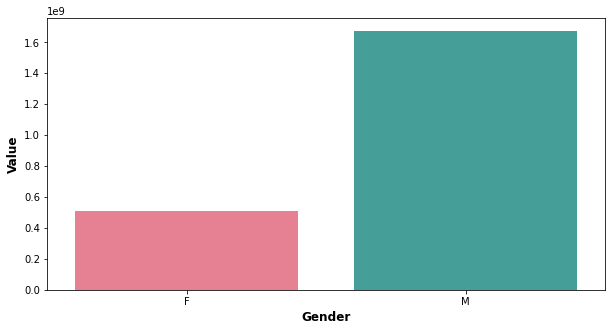

In [448]:
plt.figure(figsize=(10,5))
sn.barplot(Gender.index,Gender["Predicted_Purchase"],palette='husl')
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Gender",fontdict={"fontweight":"bold","fontsize":12})
print("This plot shows Males are going to spend more and our target should be on Males.")

In [438]:
Age=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Age",aggfunc=np.sum)


In [446]:
Occupation=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Occupation",aggfunc=np.sum)


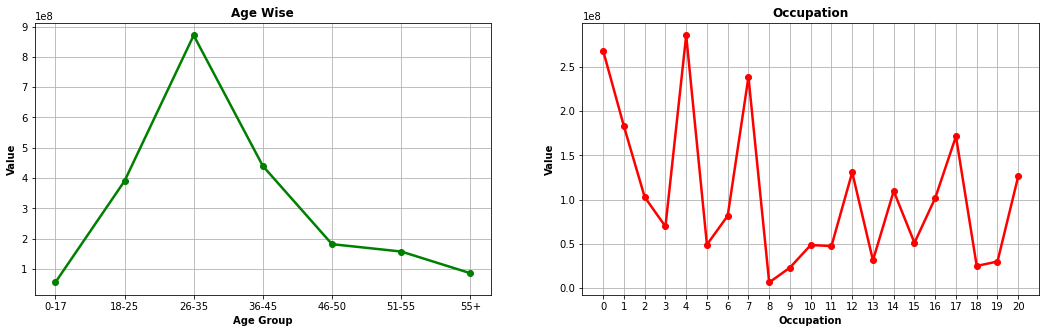

This graph shows who is going to spend more (AGE WISE AND OCCUPATION WISE)


In [584]:

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.grid()
plt.plot(Age.index,Age.values,'go-',color="green",linewidth="2.5")
plt.title("Age Wise",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Age Group",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":10})
plt.subplot(122)
plt.grid()
plt.plot(Occupation.index,Occupation.values,'go-',color="red",linewidth="2.5")
plt.title("Occupation",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Occupation",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":10})
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.show()
print("This graph shows who is going to spend more (AGE WISE AND OCCUPATION WISE)")

In [549]:
City_Category=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="City_Category",aggfunc=np.sum)
City_Category

,Predicted_Purchase
City_Category,
A,560551232.0
B,906011840.0
C,715870592.0


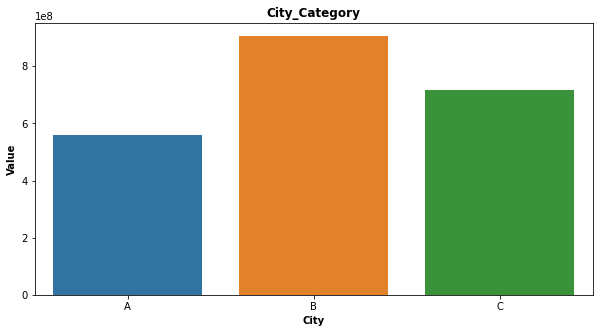

In [545]:
plt.figure(figsize=(10,5))
sn.barplot(City_Category.index,City_Category["Predicted_Purchase"])
plt.title("City_Category",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("City",fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":10})

plt.show()

In [700]:
Stay_In_Current_City_Years=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Stay_In_Current_City_Years",aggfunc=np.sum)
Stay_In_Current_City_Years

,Predicted_Purchase
Stay_In_Current_City_Years,
0,290639648.0
1,771543360.0
2,409404256.0
3,374255360.0
4+,336591072.0


In [559]:
Marital_Status=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Marital_Status",aggfunc=np.sum)

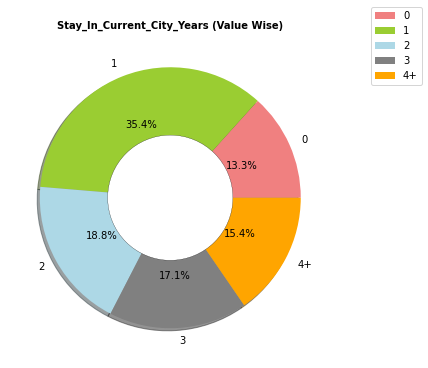

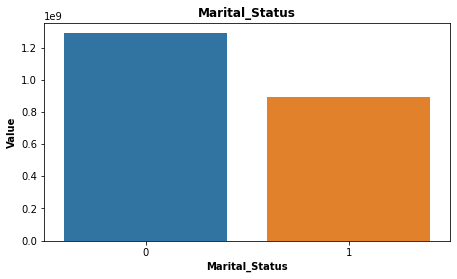

In [731]:

plt.figure(figsize=(18,6))
plt.subplot(121)
labels = "0","1","2","3","4+"
sizes = [290639648,771543360,409404256,374255360,336591072]
colors = ['lightcoral', 'yellowgreen',"lightblue","grey","orange"]
explode = (0, 0, 0)  
#print("This Pie chart show the Highest number people from A city")

plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.legend(loc="upper left",bbox_to_anchor=(1.10, 1.10), ncol=1)
plt.title("Stay_In_Current_City_Years (Value Wise)",fontdict={"fontweight":"bold","fontsize":10})       
centre_circle = plt.Circle((0,0),0.48,color='black', fc='white',linewidth=0.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(122)
plt.title("Marital_Status",{"fontweight":"bold","fontsize":12})
sn.barplot(Marital_Status.index,Marital_Status["Predicted_Purchase"])
plt.xlabel("Marital_Status",{"fontweight":"bold","fontsize":10})
plt.ylabel("Value",{"fontweight":"bold","fontsize":10})



plt.show()



In [673]:
p1=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_1",columns="Age",aggfunc=np.sum)

In [674]:
p2=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_2",columns="Age",aggfunc=np.sum)

In [675]:
p3=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_3",columns="Age",aggfunc=np.sum)

This shows 26-35 age group customers are spending more towards all category of Products.


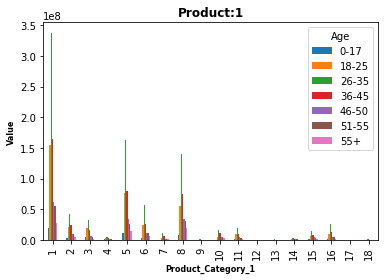

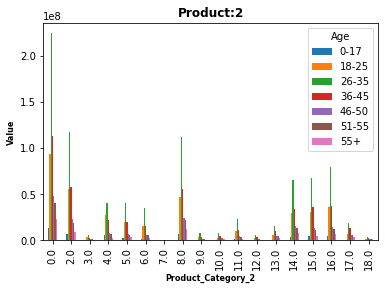

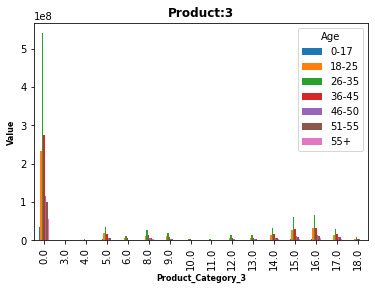

In [676]:

p1.plot(kind="bar")
plt.title("Product:1",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":8})

p2.plot(kind="bar")
plt.title("Product:2",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":8})

p3.plot(kind="bar")
plt.title("Product:3",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":8})
print("This shows 26-35 age group customers are spending more towards all category of Products.")


In [660]:
p1g=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_1",columns="Gender",aggfunc=np.sum)

In [659]:
p2g=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_2",columns="Gender",aggfunc=np.sum)

In [677]:
p3g=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_3",columns="Gender",aggfunc=np.sum)

Gender wise, Male is spending more towards all category of Products.


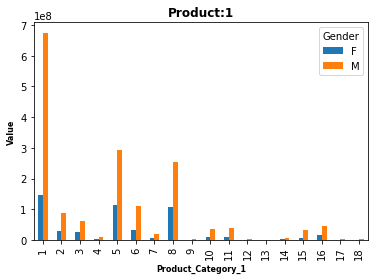

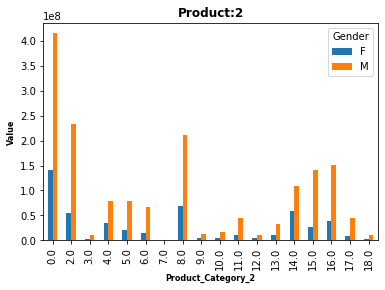

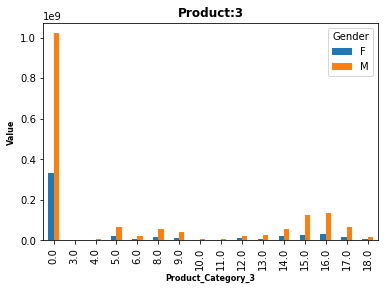

In [732]:

p1g.plot(kind="bar",)
plt.title("Product:1",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":8})

p2g.plot(kind="bar")
plt.title("Product:2",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":8})

p3g.plot(kind="bar")
plt.title("Product:3",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":8})
print("Gender wise, Male is spending more towards all category of Products.")


In [679]:
p1c=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_1",columns="City_Category",aggfunc=np.sum)

In [680]:
p2c=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_2",columns="City_Category",aggfunc=np.sum)

In [681]:
p3c=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_3",columns="City_Category",aggfunc=np.sum)

City wise, B city  is spending more towards all category of Products.


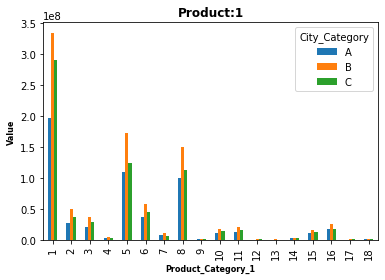

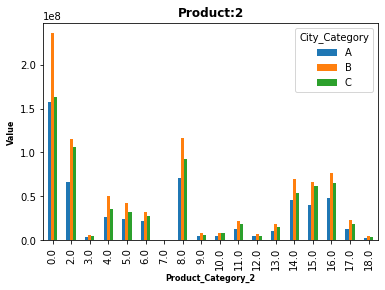

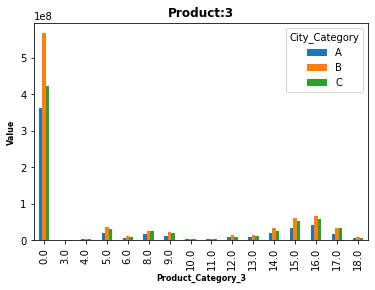

In [733]:

p1c.plot(kind="bar",)
plt.title("Product:1",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":8})

p2c.plot(kind="bar")
plt.title("Product:2",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":8})

p3c.plot(kind="bar")
plt.title("Product:3",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":8})
print("City wise, B city  is spending more towards all category of Products.")


In [688]:
p1m=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_1",columns="Marital_Status",aggfunc=np.sum)

In [689]:
p2m=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_2",columns="Marital_Status",aggfunc=np.sum)

In [690]:
p3m=pd.pivot_table(Pred_Data,values="Predicted_Purchase",index="Product_Category_3",columns="Marital_Status",aggfunc=np.sum)

Unmarried customers is spending more towards all category of Products.


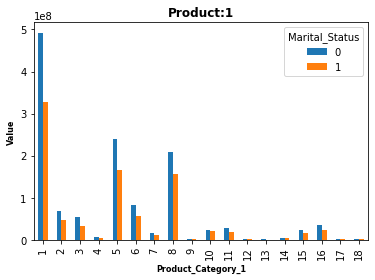

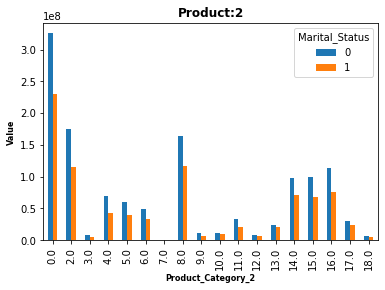

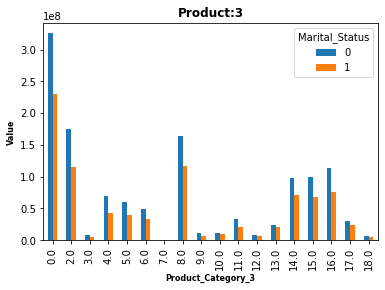

In [734]:

p1m.plot(kind="bar")
plt.title("Product:1",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_1",fontdict={"fontweight":"bold","fontsize":8})

p2m.plot(kind="bar")
plt.title("Product:2",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_2",fontdict={"fontweight":"bold","fontsize":8})

p2m.plot(kind="bar")
plt.title("Product:3",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Value",fontdict={"fontweight":"bold","fontsize":8})
plt.xlabel("Product_Category_3",fontdict={"fontweight":"bold","fontsize":8})
print("Unmarried customers is spending more towards all category of Products.")
